<a href="https://colab.research.google.com/github/Shubham-M-Rathod/ADV/blob/main/exp4/Shubham_Rathod_2021600056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exp 4

In [ ]:
df <- read.csv("/content/crime data set.csv")

In [ ]:
colnames(df)

[1] "City"                                                                                                                                                                                                                                                                                                                                                                                              
 [2] "Title"                                                                                                                                                                                                                                                                                                                                                                                             
 [3] "Text"                                                                                                                                                                                                                                                                                                                                                                                              
 [4] "Murder.Happened.with.reason..1.Property.Land.Disputes..2.Family.Dispute.3.Petty.Quarrels..4.Money.Disputes...5.Personal.Vendetta...6.Love.Affairs...7.Casteism.8..Unknown.other"                                                                                                                                                                                                                   
 [5] "Number.of.child.victims"                                                                                                                                                                                                                                                                                                                                                                           
 [6] "Number.of.male.victims.adult."                                                                                                                                                                                                                                                                                                                                                                     
 [7] "Number.of.female.victims.adult."                                                                                                                                                                                                                                                                                                                                                                   
 [8] "Kidnnaping..Number.of.child.victims"                                                                                                                                                                                                                                                                                                                                                               
 [9] "Number.of.male.adult."                                                                                                                                                                                                                                                                                                                                                                             
[10] "Number.of.female.adult."                                                                                                                                                                                                                                                                                                                                                                           
[11] "Crime.Against.Women...Combined....1..Murder.with.Rape..

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

In [ ]:
df$Number.of.child.victims[!is.finite(df$Number.of.child.victims)] <- 0

In [ ]:
df$Number.of.adult.victim[!is.finite(df$Number.of.adult.victim)] <- 0

#### Bar chart

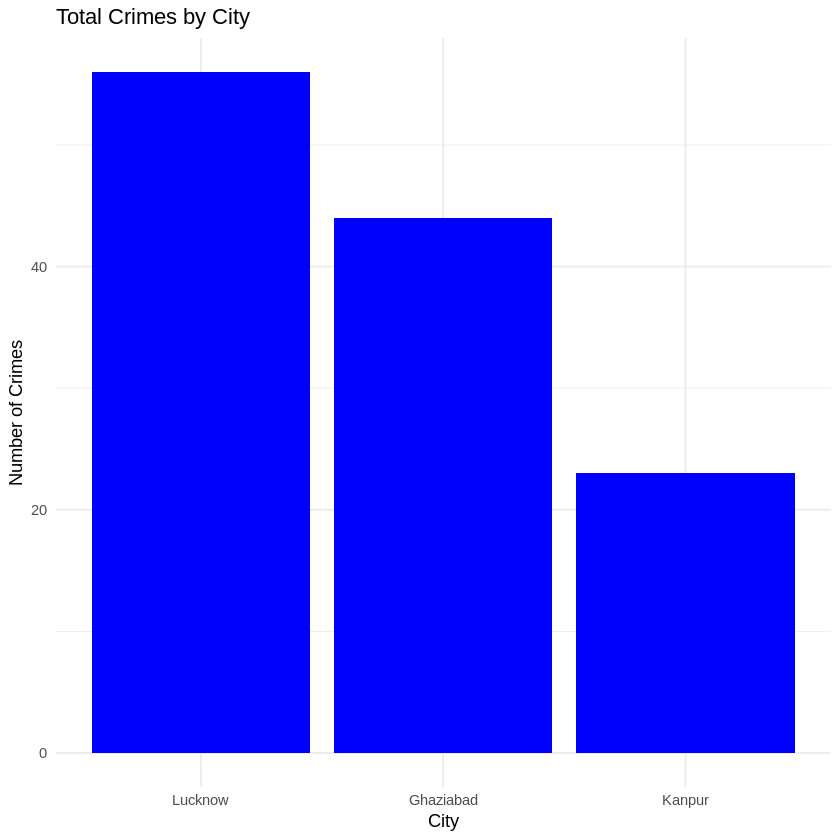

In [ ]:
df %>%
  group_by(City) %>%
  summarise(Total_Crimes = sum(Number.of.adult.victims, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(City, -Total_Crimes), y = Total_Crimes)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Total Crimes by City", x = "City", y = "Number of Crimes") +
  theme_minimal()

#### Pie Chart

In [ ]:
reason_counts

Reason,n
<chr>,<int>
,319
Casteism,2
Family Dispute,16
Love Affairs,30
Money Disputes,14
Personal Vendetta,16
Petty Quarrels,19
Property Disputes,10
Unknown reasons,40


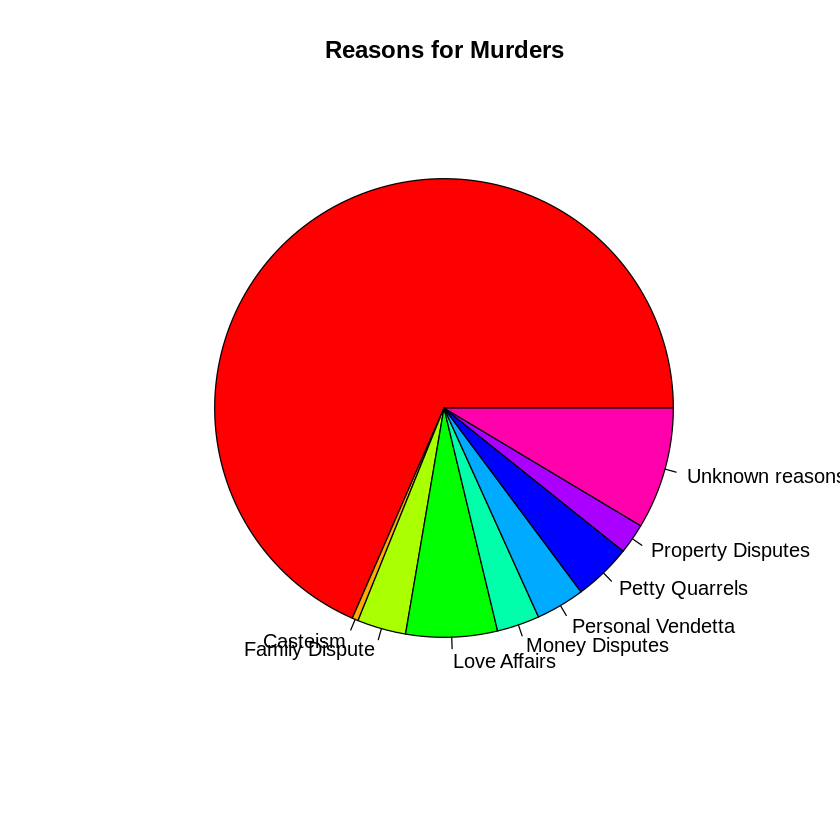

In [ ]:
reason_counts <- df %>%
  count(`Murder.Happened.with.reason..1.Property.Land.Disputes..2.Family.Dispute.3.Petty.Quarrels..4.Money.Disputes...5.Personal.Vendetta...6.Love.Affairs...7.Casteism.8..Unknown.other`) %>%
  rename(Reason = `Murder.Happened.with.reason..1.Property.Land.Disputes..2.Family.Dispute.3.Petty.Quarrels..4.Money.Disputes...5.Personal.Vendetta...6.Love.Affairs...7.Casteism.8..Unknown.other`)

reason_counts <- reason_counts %>%
  filter(!is.na(Reason))

pie(reason_counts$n, labels = reason_counts$Reason, main = "Reasons for Murders", col = rainbow(length(reason_counts$n)))

#### Histogram

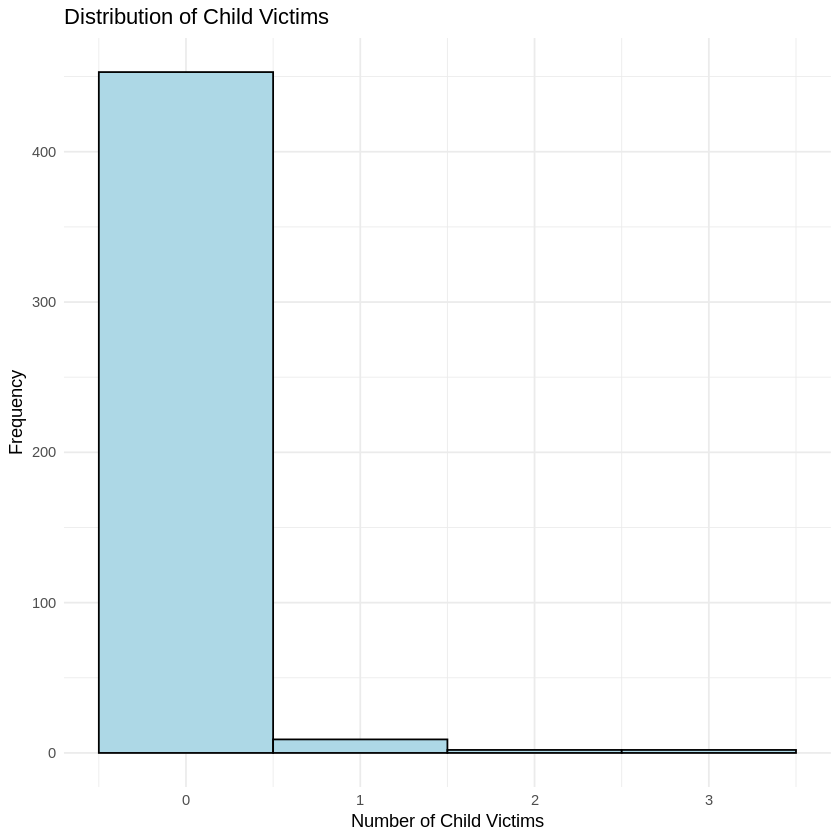

In [ ]:
ggplot(df, aes(x = Number.of.child.victims)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Child Victims", x = "Number of Child Victims", y = "Frequency") +
  theme_minimal()